# Python Dataset Exploration Notebook
This notebook demonstrates how to import common data science libraries, and access the mounted dataset via the DATA_DIR environment variable or /data.

## Import Common Libraries
Example imports of widely used data science libraries.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

## Inspect Dataset Directory
DATA_DIR is an environment variable pointing to the mounted (read-only) dataset directory. You can also access it via the /data symlink. Always prefer DATA_DIR for portability.

In [5]:
data_dir = Path(os.environ['DATA_DIR'])
print('DATA_DIR =', data_dir)
print('\nListing via DATA_DIR:')
for p in data_dir.iterdir():
    print(' -', p.name)


DATA_DIR = /data

Listing via DATA_DIR:
 - BSEC_ACSM_X_AE33_Mass_Concentration_Composition_20240320_R0.ict


## Simple Viz
Provide sample implementation to plot:
1. Mass concentrations of organics, sulfate, nitrate, ammonium, chloride, and black carbon.
2. Elemental ratios (O/C, H/C, OM/OC).

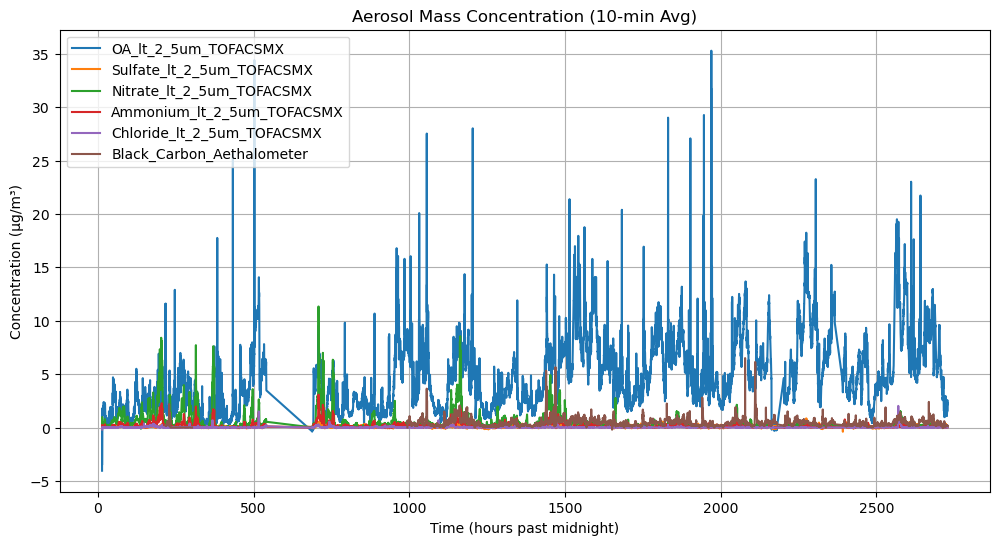

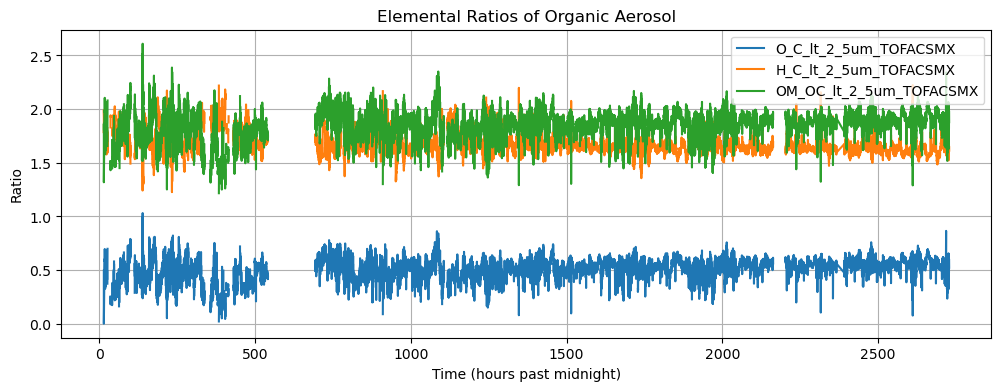

In [6]:
# ---- File ----
ict_file = os.path.join(os.environ['DATA_DIR'], 
                       'BSEC_ACSM_X_AE33_Mass_Concentration_Composition_20240320_R0.ict')
# ---- Step 1: Find header line for data ----
with open(ict_file, 'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if line.startswith("TOFACSMX_BC_start_time") and 'Black_Carbon_Aethalometer' in line:
        header_line_index = i
        break

# ---- Step 2: Read CSV from that line ----
df = pd.read_csv(
    ict_file,
    skiprows=header_line_index,
    delimiter=',',
    na_values=[-9999, -9999.0, -9999.000]
)

# ---- Step 2b: Strip whitespace from column names ----
df.columns = df.columns.str.strip()

# ---- Step 3: Convert time (seconds past midnight) to hours ----
df['Time_hours'] = df['TOFACSMX_BC_start_time'] / 3600

# ---- Step 4: Plot main aerosol species ----
species_cols = [
    'OA_lt_2_5um_TOFACSMX',
    'Sulfate_lt_2_5um_TOFACSMX',
    'Nitrate_lt_2_5um_TOFACSMX',
    'Ammonium_lt_2_5um_TOFACSMX',
    'Chloride_lt_2_5um_TOFACSMX',
    'Black_Carbon_Aethalometer'
]

plt.figure(figsize=(12,6))
for col in species_cols:
    plt.plot(df['Time_hours'], df[col], label=col)
plt.xlabel('Time (hours past midnight)')
plt.ylabel('Concentration (µg/m³)')
plt.title('Aerosol Mass Concentration (10-min Avg)')
plt.legend()
plt.grid(True)
plt.show()

# ---- Step 5: Plot elemental ratios ----
ratio_cols = ['O_C_lt_2_5um_TOFACSMX', 'H_C_lt_2_5um_TOFACSMX', 'OM_OC_lt_2_5um_TOFACSMX']
plt.figure(figsize=(12,4))
for col in ratio_cols:
    plt.plot(df['Time_hours'], df[col], label=col)
plt.xlabel('Time (hours past midnight)')
plt.ylabel('Ratio')
plt.title('Elemental Ratios of Organic Aerosol')
plt.legend()
plt.grid(True)
plt.show()